In [1]:
# Thirawat Boonsang 63011357

# set up
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Model, layers, models
from tensorflow.keras.datasets import mnist
from IPython.display import Image

In [2]:
# prepare dataset

# MNIST dataset parameters

num_classes = 10 # total classes (0-9 digits)
num_features = 784 # data features (img shape: 28 X 28 = 784)

# import and load MNIST data, split between and test datasets

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# convert pixel values to float32

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# normalize image pixcel values from [0, 255] to [0, 1]

x_train, x_test = x_train / 255., x_test / 255.

# check the shape of MNIST data

print('MNIST Dataset Shapes:')
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test: ' + str(x_test.shape))
print('y_test: ' + str(y_test.shape))
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

11501568/11490434 [==============================] - 3s 0us/step
MNIST Dataset Shapes:
x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [16]:
# Creating the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1369 - accuracy: 0.9570 - val_loss: 0.0796 - val_accuracy: 0.9753
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0434 - accuracy: 0.9865 - val_loss: 0.0345 - val_accuracy: 0.9886
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0315 - accuracy: 0.9904 - val_loss: 0.0253 - val_accuracy: 0.9918
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0227 - accuracy: 0.9926 - val_loss: 0.0357 - val_accuracy: 0.9892
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0191 - accuracy: 0.9940 - val_loss: 0.0302 - val_accuracy: 0.9911
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0165 - accuracy: 0.9945 - val_loss: 0.0351 - val_accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0132 - accuracy: 0.9958 - val_loss: 0.0372 - val_ac

313/313 - 1s - loss: 0.0442 - accuracy: 0.9889 - 1s/epoch - 4ms/step


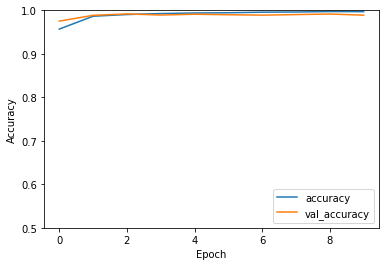

In [19]:
# Ploting the result
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)